<a href="https://colab.research.google.com/github/lmassaron/ml4dummies_3ed/blob/main/ML4D3E_15_resorting_to_ensembles_of_learners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set(style='whitegrid', palette='deep',
        font='sans-serif')

repository = "https://github.com/lmassaron/"
release = "ml4dummies_3ed/releases/download/v1.0/"
filename = repository + release + "wine_quality.csv"
wine = pd.read_csv(filename)

X_train, X_test = train_test_split(
    wine,
    test_size=0.3,
    stratify=wine['quality'],
    random_state=42)

y_train = X_train.iloc[:, 0]
X_train = X_train.iloc[:, 1:]
y_test, X_test = X_test.iloc[:, 0], X_test.iloc[:, 1:]

In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

n_range = [10, 25, 50, 100, 150, 200, 250, 300, 500]
test_scores = []

for n in n_range:
    rf = RandomForestRegressor(
        n_estimators=n,
        max_depth=14,
        random_state=42,
        n_jobs=-1)

    rf.fit(X_train, y_train)
    predictions = rf.predict(X_test)
    error = mean_absolute_error(y_test, predictions)
    test_scores.append(error)

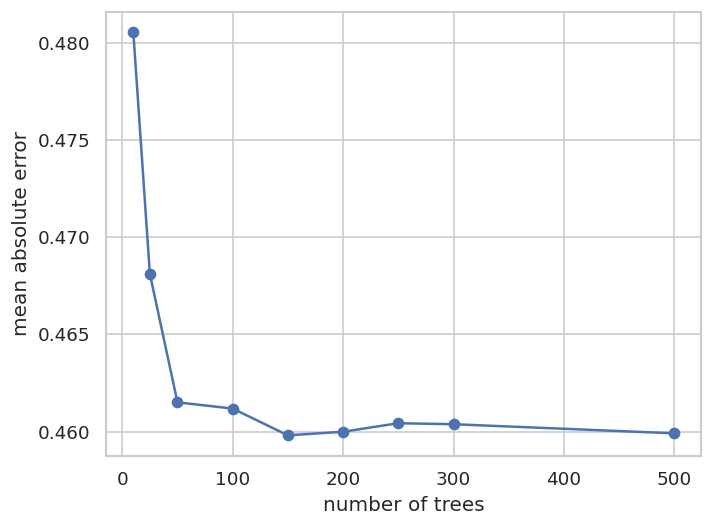

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=120)
plt.plot(n_range, test_scores, '-o')
plt.xlabel('number of trees')
plt.ylabel('mean absolute error')
plt.show()

In [4]:
from sklearn.inspection import permutation_importance

rf = RandomForestRegressor(n_estimators=500,
                           max_features='sqrt',
                           random_state=42)
rf.fit(X_train, y_train)
preds = rf.predict(X_test)
mae = mean_absolute_error(y_test, preds)
print(f"Test mean absolute error for rf: {mae:0.3f}")

Test mean absolute error for rf: 0.435


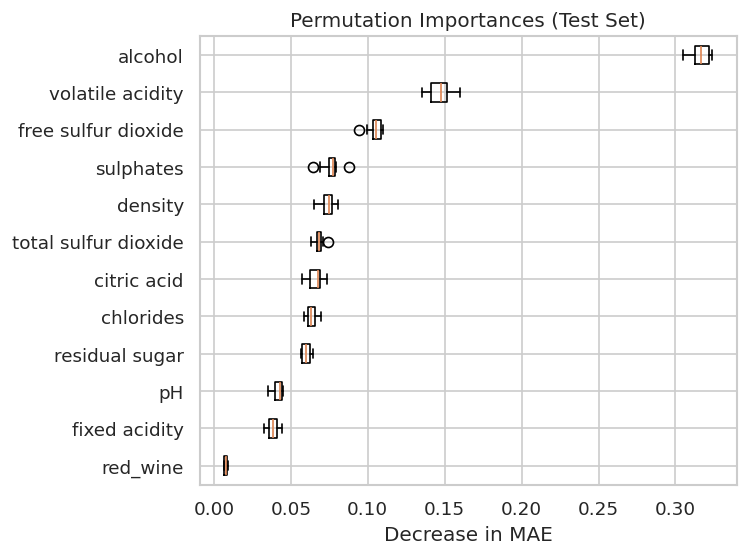

In [5]:
result = permutation_importance(
    rf, X_test, y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1)

sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(dpi=120)
ax.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    tick_labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (Test Set)")
ax.set_xlabel("Decrease in MAE")
fig.tight_layout()
plt.show()

In [6]:
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

dt = DecisionTreeRegressor(max_depth=1)
lr = LinearRegression ()
knn = KNeighborsRegressor(n_neighbors=10)

labels = ['Decision Tree', 'Linear Regression', 'KNN']
base_models = [dt, lr, knn]

for label, base_model in zip(labels, base_models):
    model = AdaBoostRegressor(
        estimator=base_model,
        n_estimators=300,
        random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    print(f"Test MAE for {label}: {mae:.3f}")

Test MAE for Decision Tree: 0.644
Test MAE for Linear Regression: 0.580
Test MAE for KNN: 0.694


In [7]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(
    n_estimators=550,
    learning_rate=0.05,
    max_depth=15,
    subsample=0.6,
    random_state=42)

gbm.fit(X_train, y_train)
predictions = gbm.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Test Mean Absolute Error for GBM: {mae:.3f}")

Test Mean Absolute Error for GBM: 0.395


In [8]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(
    n_estimators=550,
    learning_rate=0.05,
    max_depth=15,
    subsample=0.6,
    colsample_bytree=0.7,
    random_state=42)

xg_reg.fit(X_train, y_train)
predictions = xg_reg.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Test Mean Absolute Error for XGBoost: "
      f"{mae:.3f}")

Test Mean Absolute Error for XGBoost: 0.389


In [9]:
import lightgbm as lgb

lgb_reg = lgb.LGBMRegressor(
    n_estimators=2000,
    learning_rate=0.12,
    max_depth=18,
    subsample=0.6,
    colsample_bytree=0.85,
    random_state=42,
    verbose=-1)
lgb_reg.fit(X_train, y_train)
predictions = lgb_reg.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Test Mean Absolute Error for LightGBM: "
      f"{mae:.3f}")

Test Mean Absolute Error for LightGBM: 0.410


In [10]:
!pip install catboost

In [11]:
from catboost import CatBoostRegressor

cat_reg = CatBoostRegressor(
    iterations=900,
    learning_rate=0.07,
    depth=12,
    subsample=0.55,
    colsample_bylevel=0.6,
    random_state=42,
    thread_count=-1,
    verbose=0)
cat_reg.fit(X_train, y_train)
predictions = cat_reg.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Test Mean Absolute Error for CatBoost: "
      f"{mae:.3f}")

Test Mean Absolute Error for CatBoost: 0.399


In [12]:
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR

gbm = GradientBoostingRegressor(n_estimators=500,
                learning_rate=0.1, max_depth=8,
                subsample=0.65, random_state=42)
svr = SVR(C=2.5, gamma=0.7, epsilon=0.0005)

blender = VotingRegressor(
    estimators=[("gbm", gbm), ("svm", svr)], n_jobs=-1)
blender.fit(X_train, y_train)
predictions = blender.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Test mean absolute error for blender: "
      f"{mae:0.3f}")

Test mean absolute error for blender: 0.414


In [13]:
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import KFold

gbm = GradientBoostingRegressor(n_estimators=200,
                learning_rate=0.05, max_depth=3,
                subsample=0.85, random_state=42)
svr = SVR(C=20.0, gamma=0.001, epsilon=0.004)
rf = RandomForestRegressor(n_estimators=150,
                           random_state=42)

cv = KFold(n_splits=10, shuffle=True, random_state=42)
stacker = StackingRegressor(
    estimators=[("svm'", svr), ("rf", rf)],
    final_estimator=gbm,
    passthrough=True,
    cv=cv,
    n_jobs=-1)

stacker.fit(X_train, y_train)
predictions = stacker.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Test mean absolute error for stacker: "
      f"{mae:0.3f}")

Test mean absolute error for stacker: 0.431
